<a href="https://colab.research.google.com/github/rmahesh6386/DataScience_Python/blob/main/Assignment_04_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment_04_Q2

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


EDA and Data Visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


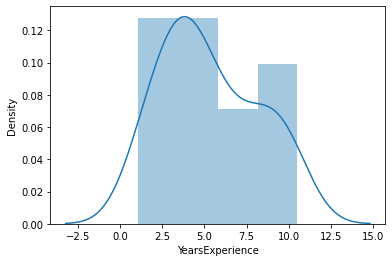

In [4]:
sns.distplot(df['YearsExperience'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


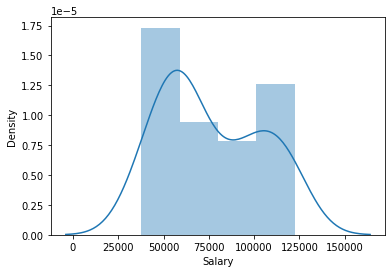

In [5]:
sns.distplot(df['Salary'])

In [6]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


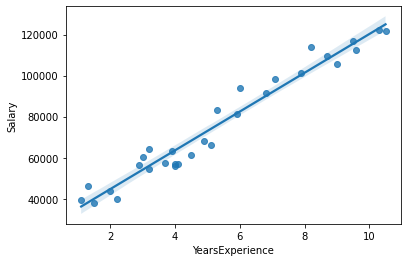

In [7]:
sns.regplot(x=df['YearsExperience'],y=df['Salary'])

the correlation analysis tells that YearsExperience	 and Salary are very strongly positively related which is clearly evident fron the regression plot graph also.

In [8]:
model=smf.ols("Salary~YearsExperience",data=df).fit()

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           1.14e-20
Time:                        15:41:42   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# prediction of salary hike for say years of experience of 5
sal = (2.579e+04) + (9449.9623)*(5)
sal

73039.8115

In [11]:
# Prediction model for say years of experience 5, 7
new_data=pd.Series([5,7])
new_data

0    5
1    7
dtype: int64

In [12]:
new_data=pd.DataFrame(new_data,columns=['YearsExperience'])
new_data

,YearsExperience
0,5
1,7


In [13]:
model.predict(new_data)

0    73042.011806
1    91941.936449
dtype: float64

In [14]:
df1 = df

In [16]:
df1['YearsExperience2'] = df1['YearsExperience']**2

In [17]:
model_1 = smf.ols("Salary~YearsExperience2",data = df1).fit()

In [18]:
model_1.params

Intercept           48042.585515
YearsExperience2      776.318773
dtype: float64

In [19]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     302.7
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           1.52e-16
Time:                        15:43:10   Log-Likelihood:                -311.59
No. Observations:                  30   AIC:                             627.2
Df Residuals:                      28   BIC:                             630.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.804e+04   2186.372     21.974      0.000    4.36e+04    5.25e+04
YearsExperience2   776.3188     44.624     17.397      0.000     684.911     867.726
==============================================================================
Omnibus:                        1.294   Durbin-Watson:                   0.883
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                1.240
Skew:                           0.409   Prob(JB):                        0.538
Kurtosis:                       2.432   Cond. No.                         72.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
df1['log_YearsExperience'] = np.log(df1['YearsExperience'])

In [21]:
df1.head(3)

,YearsExperience,Salary,YearsExperience2,log_YearsExperience
0,1.1,39343.0,1.21,0.095310
1,1.3,46205.0,1.69,0.262364
2,1.5,37731.0,2.25,0.405465


In [22]:
model_2= smf.ols('Salary~log_YearsExperience', data=df1).fit()

In [23]:
model_2.params

Intercept              14927.97177
log_YearsExperience    40581.98796
dtype: float64

In [24]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           3.25e-13
Time:                        15:52:10   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
log_YearsExperience  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
df1['sqrt_YearsExperience'] = df1['YearsExperience']**(1/2)

In [26]:
df1.head(3)

,YearsExperience,Salary,YearsExperience2,log_YearsExperience,sqrt_YearsExperience
0,1.1,39343.0,1.21,0.095310,1.048809
1,1.3,46205.0,1.69,0.262364,1.140175
2,1.5,37731.0,2.25,0.405465,1.224745


In [27]:
model_3= smf.ols('Salary~sqrt_YearsExperience', data=df1).fit()

In [28]:
model_3.params

Intercept              -16055.769117
sqrt_YearsExperience    41500.680583
dtype: float64

In [29]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           8.57e-18
Time:                        15:58:34   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
sqrt_YearsExperience   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
#from the above all models we can see the adjusted R-squared value of first model is comparatively highest 
#hence we can finalise the result of first model as the best model

In [31]:
model_final = model

In [32]:
new_data1=pd.Series([4,9,6])
new_data1

0    4
1    9
2    6
dtype: int64

In [34]:
new_data1=pd.DataFrame(new_data1,columns=['YearsExperience'])
new_data1

,YearsExperience
0,4
1,9
2,6


In [35]:
pred_data = model_final.predict(new_data1)
pred_data

0     63592.049484
1    110841.861092
2     82491.974127
dtype: float64